In [138]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

irisData = pd.read_csv('Iris.csv')
irisData.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [139]:
# Create feature and target arrays
y = irisData['Species']
X = irisData.drop(['Species'],axis = 1)
print(y.head())
print(X.head())

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


In [140]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
#Predicting the test set result  
y_pred= knn.predict(X_test)  

1.0


<AxesSubplot:>

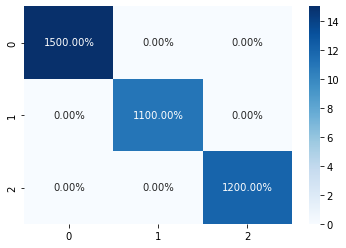

In [157]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='.2%', cmap='Blues')

knn from sckrch

https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c 

In [143]:
import numpy as np
import scipy.spatial
from collections import Counter

In [144]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            #print(votes)    
            ans = Counter(votes).most_common(1)[0][0] # this is a in build method which  return item with frquencey 
            #like [a:3,b:4] formate # we eatracted only first row first value
            final_output.append(ans) # this is a complet scaler single value
            
        return final_output
    # score method
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        c = 0
        for i in range(len(X_test)):
            if(predictions[i] == y_test[i]):
                c = c+1
        return c/len(X_test)
    

Let's try it with small exmple

In [145]:
clf = KNN(2)
X_train = [10,11,28,31,35,9]
y_train = [0,0,1,1,1,0]
clf.fit(X_train, y_train)
X_test = [2,37]
len(X_test)
prediction = clf.predict(X_test)
#print(prediction)
y_test = [0,0]
clf.score(X_test,y_test)

0.5

Implement on Iris

In [154]:
irisData = pd.read_csv('Iris.csv')
irisData.head()
irisData = irisData.drop(['Id'],axis = 1)
# Create feature and target arrays

y = irisData['Species']
X = irisData.drop(['Species'],axis = 1)
# = le.fit_transform(y)
y = y.to_numpy()
X = X.to_numpy()

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [158]:
clf = KNN(2)
clf.fit(X_train, y_train)
#print(X_test)
prediction = clf.predict(X_test)
clf.score(X_test,y_test)

1.0

1.0


<AxesSubplot:>

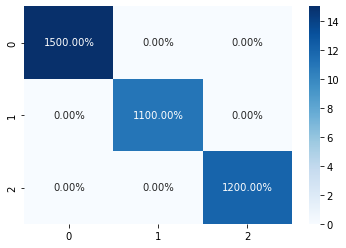

In [160]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, prediction)
print(ac)
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, prediction)  
cm
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='.2%', cmap='Blues')